## Using K-NN Classification to Determine Subscription Status to Game Related Newsletter

#### Group 4: Skyler Lim-Voon, Evelyn Min, Lemon Campbell & Kelsey Xian

## Introduction

A research group in Computer Science at UBC, led by Frank Wood, has set up a Minecraft server to explore how people play and develop interest in video games. However, to fully understand the financial and technical needs of this project, the researchers must know which kinds of players are likely to join the server and how many resources these users will occupy. The following analysis aims to answer the research group’s broad question of “What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?” More specifically, our analysis explores if number of sessions, total number of played hours, and mean session duration can be used to predict if players will subscribe to a game-related newsletter as well as the potential variations between gender.

### Question 
#### Broad Question: 
Question 1: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?
<br>
<br>
#### Specific Question:
Can hours played, age, and average session length predict whether a user is subscribed to a game-related newsletter? Additionally, does this differ by gender?

### Data
To analyze our question, we will use the following two data sets: 
<br>
<br>


`players.csv` contains information about the users of the Minecraft server, PLAICraft. There are 196 observations and 7 variables as follows: 
- `experience` - character: player's self-determined experience level (`Beginner`, `Amateur`, `Regular`, `Veteran`, or `Pro`)
- `subscribe` - logical: player's subscription status to a game-related newsletter (`TRUE` or `FALSE`)
- `hashedEmail` - character: hashed player's email
- `played_hours` - double: total hours played by each user 
- `name` - character: player's first name
- `gender` - character: player's gender
- `Age` - double: player's age
<br>
<br>

There are also two missing values in `Age` that should be considered.

`sessions.csv` contains information about sessions played on PLAICraft. There are 1535 observations and 5 variables as follows:
- `hashedEmail` - character: hashed player's email
- `start_time` - character: session start time in dd/mm/yyyy time 
- `end_time` - character: session end time in dd/mm/yyyy time 
- `original_start_time` - double: session start time in milliseconds since January 1st, 1970 at Coordinated Universal Time (UNIX time)
- `original_end_time` - double: session end time in milliseconds since January 1st, 1970 at Coordinated Universal Time (UNIX time)
<br>
<br>

There are also two missing values in `endtime` that corespond to missing values in `original_end_time` that should be noted.


## Methods and Results 

The code below loads the necessary libraries and data sets to our project.

In [1]:
#loading libraries
library(tidyverse)
library(repr)
library(tidymodels)
library(lubridate)
library(ggplot2)
library(themis)
options(repr.matrix.max.rows = 10) 

#loading players.csv
players_data <- read_csv("https://raw.githubusercontent.com/skylv777/dsci100_group_project/refs/heads/main/players.csv")

#loading sessions.csv
sessions_data <- read_csv("https://raw.githubusercontent.com/skylv777/dsci100_group_project/refs/heads/main/sessions.csv")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

The code converts both start_time and end_time into proper datetime format so the values are tidy and creates a new column, session_length. After that, we calculated the average session length for each player and merged this summarized session-length data with the original players_data to produce a combined dataset. When we merged the data sets we reduced the dataset from 196 players to 121 due to dropping missing data in `sessions_data` and `players_data` as well as some players not having played any sessions. 

In [21]:
#Tidying sessions_data so there is only one value per cell by converting to dttm format
sessions_data_tidy <- sessions_data |>
         mutate(start_time = dmy_hm(start_time)) |>
         mutate(end_time = dmy_hm(end_time))

#Creating sessions_length column
sessions_data_difference <- sessions_data_tidy |>
        mutate(session_length = end_time - start_time) |>
        mutate(session_length = as.double(session_length))

# Determining average session length per player
average_sessions_data <- sessions_data_tidy |>
         mutate(session_length = end_time - start_time) |>
         mutate(session_length = as.double(session_length)) |>
         group_by(hashedEmail) |>
         select(session_length) |>
         summarize(average_session_length = mean(session_length))

# Combining Data Sets
merge_data <- merge(players_data, average_sessions_data)

#Dropping missing values
combined_data <- drop_na(merge_data)
combined_data 

Adding missing grouping variables: `hashedEmail`


hashedEmail,experience,subscribe,played_hours,name,gender,Age,average_session_length
<chr>,<chr>,<lgl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,Regular,TRUE,1.5,Isaac,Male,20,53.00000
060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,Pro,FALSE,0.4,Lyra,Male,21,30.00000
0ce7bfa910d47fc91f21a7b3acd8f33bde6db57912ce0290fa0437ce0b97f387,Beginner,TRUE,0.1,Osiris,Male,17,11.00000
0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,Regular,TRUE,5.6,Winslow,Male,17,32.15385
0d70dd9cac34d646c810b1846fe6a85b9e288a76f5dcab9c1ff1a0e7ca200b3a,Pro,TRUE,1.0,Knox,Male,17,35.00000
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
fc0224c81384770e93ca717f32713960144bf0b52ff67639433a5c06a653a882,Amateur,TRUE,0.2,Gemna,Male,27,16.00000
fcab03c6d3079521e7f9665caed0f31fe3dae6b5ccb86e6cb58747a43aa8789f,Pro,TRUE,1.2,Sakura,Male,17,80.00000
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,Amateur,TRUE,56.1,Dana,Male,23,15.46774


### Summary Statistics
​​The code computes the mean, median, mode, minimum, maximum, first quartile, third quartile, and standard deviation, while removing missing values for each quantitative variable of the combined data. A small helper function is used to calculate the mode by counting the most frequent value. 

In [22]:
#Summary Statistics on Quantitative Values of combined_data 
combined_data_select <- select(combined_data, Age, played_hours, average_session_length)

players_data_stats <- 
        bind_rows(map_df(combined_data_select, mean, na.rm = TRUE), 
                  map_df(combined_data_select, median, na.rm = TRUE),
                  map_df(combined_data_select, ~{
    x <- na.omit(.x)
    if (length(x) == 0) return(NA_real_)
    tibble(val = x) |>
      count(val, sort = TRUE) |>
      filter(n == max(n)) |>
      slice_head(n = 1) |>   
      pull(val)}),
                  map_df(combined_data_select, min, na.rm = TRUE),
                  map_df(combined_data_select, max, na.rm = TRUE), 
                  map_df(combined_data_select, sd, na.rm = TRUE), #?seems too high
                  map_df(combined_data_select, ~ quantile(.x, probs = 0.25, na.rm = TRUE)[[1]]),
                  map_df(combined_data_select, ~ quantile(.x, probs = 0.5, na.rm = TRUE)[[1]]),
                  map_df(combined_data_select, ~ quantile(.x, probs = 0.75, na.rm = TRUE)[[1]])) |>
        mutate(Summary = c("Mean", "Median", "Mode", "Minimum", "Maximum", "Standard Deviation", "1st Quartile", "2nd Quartile", "3rd Quartile")) |>
        relocate(Summary) |>
        mutate(across(Age:average_session_length, \(x) round(x, digits = 2))) 
players_data_stats

Summary,Age,played_hours,average_session_length
<chr>,<dbl>,<dbl>,<dbl>
Mean,21.64,7.66,32.06
Median,19.00,0.40,19.00
Mode,17.00,0.10,5.00
Minimum,9.00,0.00,5.00
Maximum,58.00,223.10,147.00
Standard Deviation,8.47,30.12,31.00
1st Quartile,17.00,0.10,10.00
2nd Quartile,19.00,0.40,19.00
3rd Quartile,23.00,1.50,43.00


*figure 1*

### Summary Visualizations

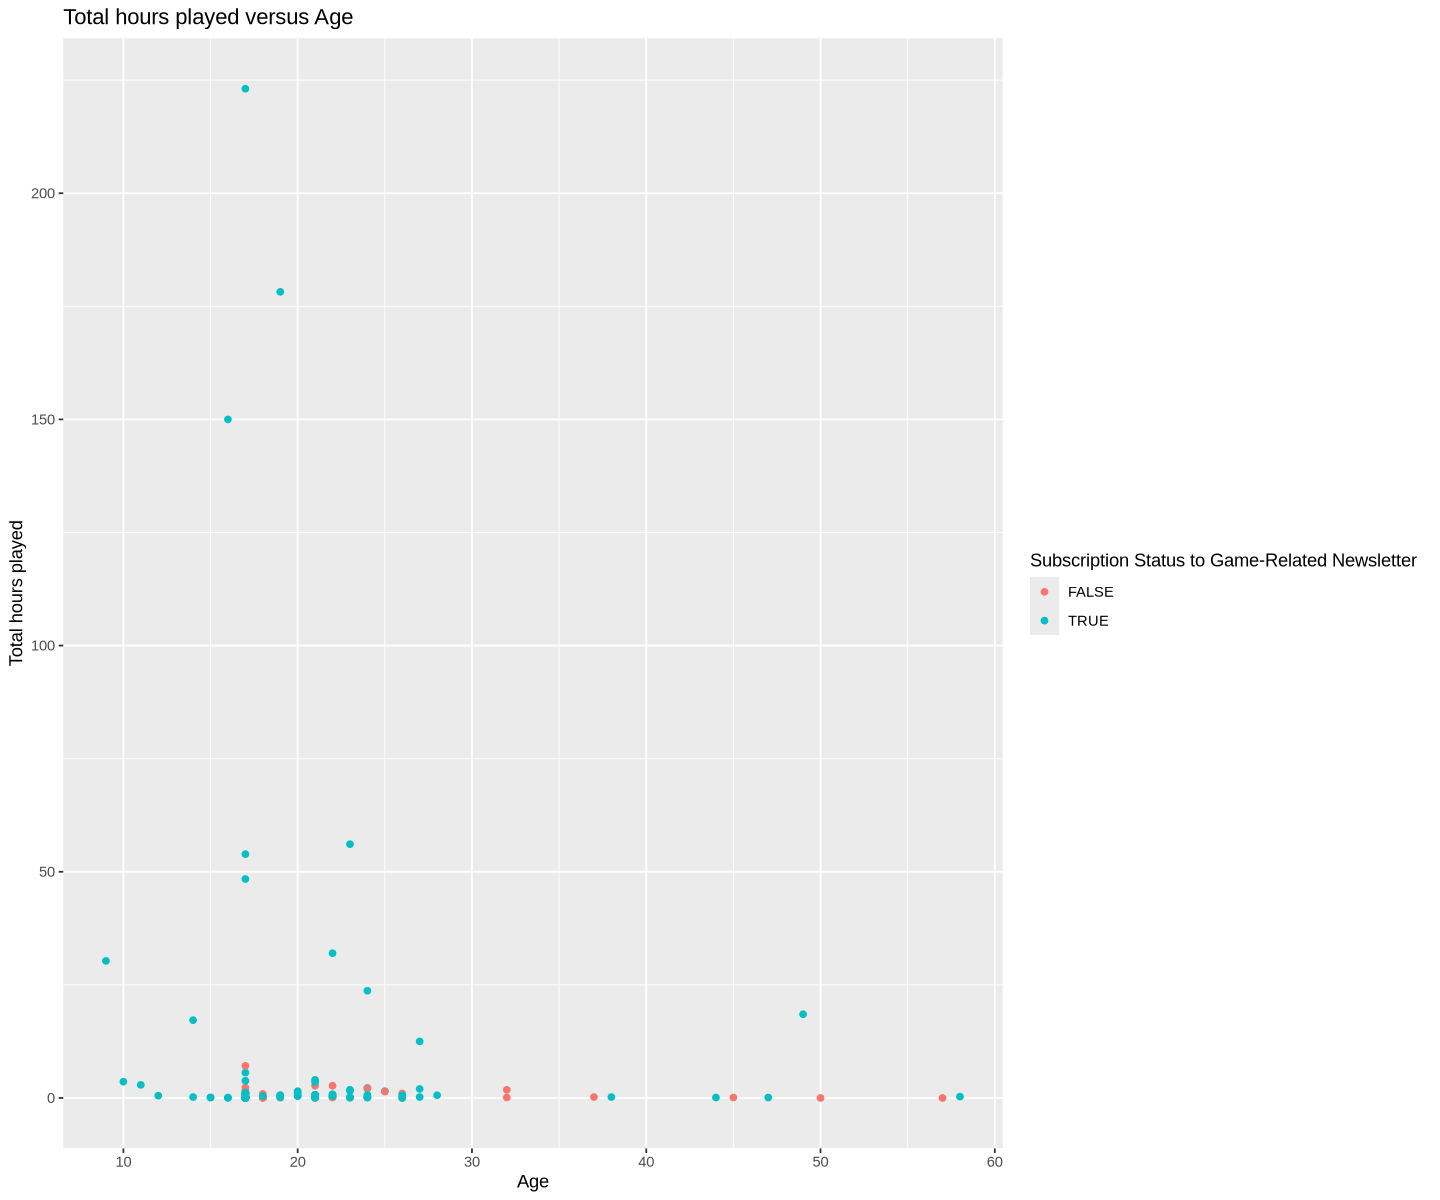

In [26]:
options(repr.plot.height = 10, repr.plot.width = 12)
#creating a plot to compare age, played hours, and subscription status
hours_age_subscribe_plot <- combined_data |>
        ggplot(aes(x = Age, y = played_hours, colour = subscribe)) +
        geom_point() +
        labs (x = "Age",
              y = "Total hours played",
              colour = "Subscription Status to Game-Related Newsletter") +
        ggtitle("Total hours played versus Age")
hours_age_subscribe_plot   

*figure 2*

It appears that the majority of players are under 30 and users over 30 are less likely to be subscribed to a newsletter. Most users have total hours played under 10 hours and this is especially true for players over the age of 30. Additionally, all players who played more than 20 hours total were subscribed to a newsletter This suggests possible correlations between subscription status, age, and total hours played. 

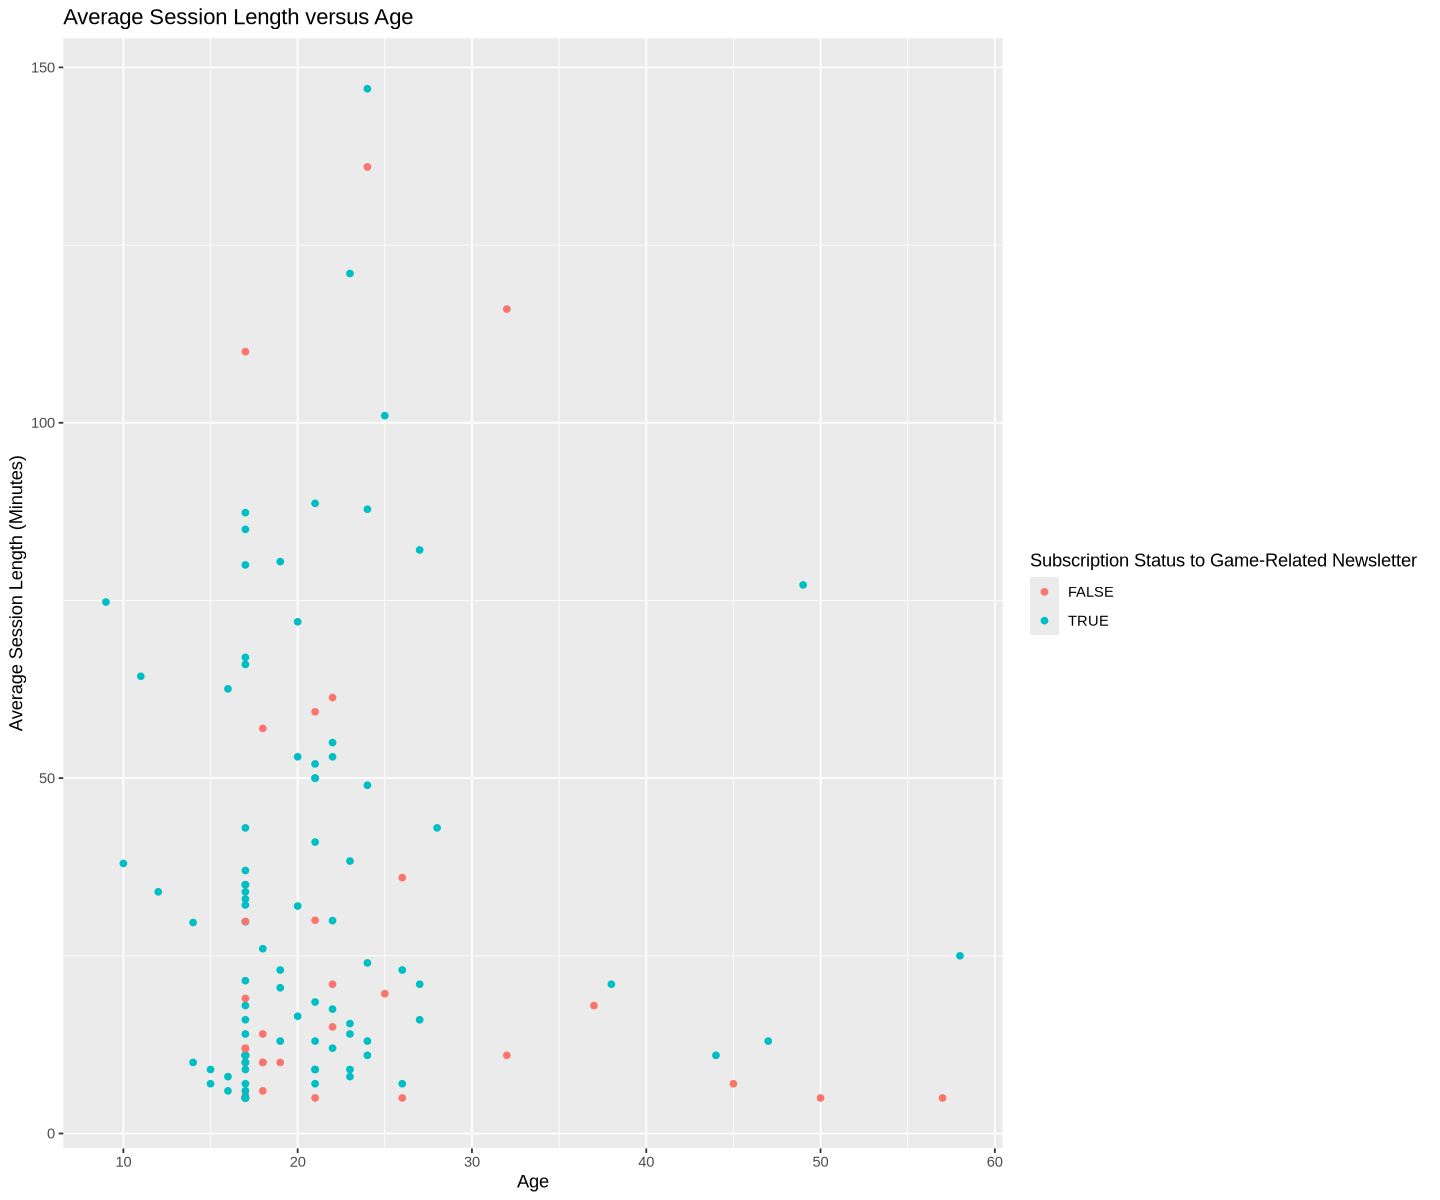

In [27]:
#creating a plot to compare age, session length, and subscription status
average_age_plot <- combined_data |>
        ggplot(aes(x = Age, y = average_session_length, colour = subscribe)) +
        geom_point() +
        labs (x = "Age",
              y = "Average Session Length (Minutes)",
              colour = "Subscription Status to Game-Related Newsletter") +
        ggtitle("Average Session Length versus Age")
average_age_plot  

*figure 3*

It appears that the ratio between users subscribed to users not subscribed to a newsletter is higher for players with an average session length above 25 minutes. Additionally, users above the age of 30 appear more likely to have an average session length below 25 minutes.

### Data Analysis

#### Creating the Model

First we set a seed, convert `subscribe` into a factor and split `combined_data` into 75% training set and 25% testing set. Then the training data is used to create a recipe to predict subscription level based on the predictors age, played hours, and average session length. The training data is also scaled and centered to ensure that the variables are equally weighted. A model is set to tune for an appropriate k value and a tibble was created for a range of k-values from 1-55. Three fold cross validation was implemented to properly fit the training data to determine the accuracy estimate of each of the potential k values. 

[1] 5

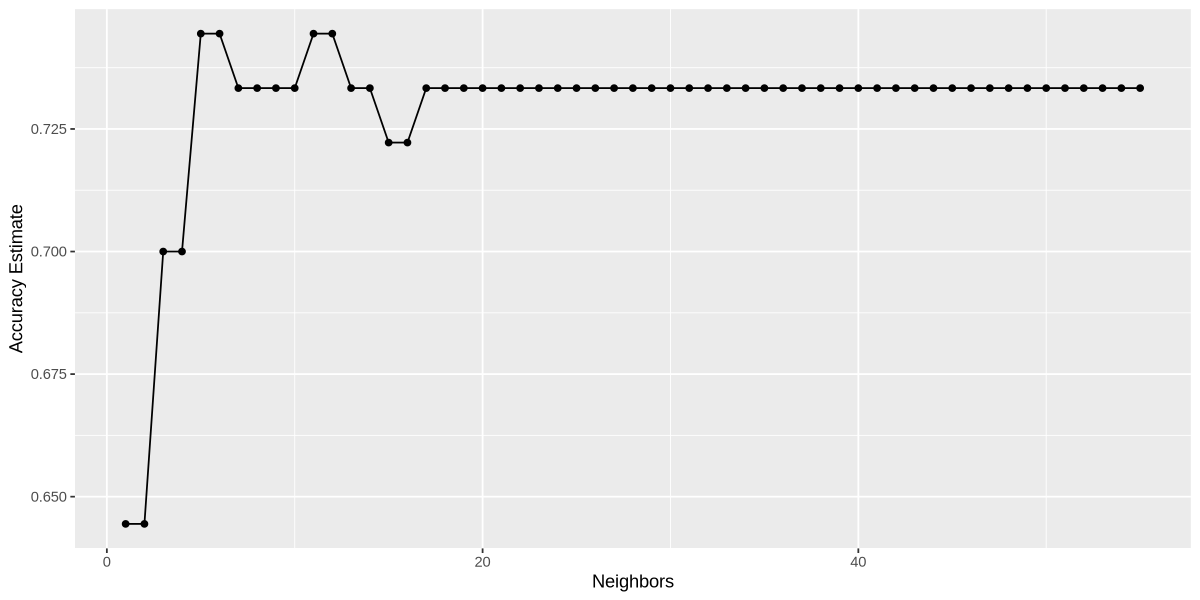

In [28]:
#setting seed for reproducibility
set.seed(1)
combined_data_fct <- mutate(combined_data, subscribe = as_factor(subscribe)) 

#creating training and testing sets with 25/75 split
videogame_split <- initial_split(combined_data_fct, prop = 0.75, strata = subscribe)
videogame_train <- training(videogame_split)
videogame_test <- testing(videogame_split)  

#creating recipe including scaling and centring 
videogame_recipe <- recipe(subscribe ~ Age + played_hours + average_session_length, data = videogame_train) |>
        step_scale(all_predictors()) |>
        step_center(all_predictors())

#creating knn model 
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
        set_engine("kknn") |>
        set_mode("classification") 

k_vals <- tibble(neighbors = seq(from = 1, to = 55, by = 1))

#Three fold cross validation
videogame_vfold <- vfold_cv(videogame_train, v = 3, strata = subscribe)
    
videogame_wkfl <- workflow() |>
        add_recipe(videogame_recipe) |>
        add_model(knn_spec) |>
        tune_grid(resamples = videogame_vfold, grid = k_vals) |>
        collect_metrics() |> 
        filter(.metric == "accuracy") 
options(repr.plot.height = 5, repr.plot.width = 10)

#Plot of k values 
k_plot <- videogame_wkfl |>
        ggplot(aes(x = neighbors, y = mean)) +
        geom_point() +
        geom_line() +
        labs(x = "Neighbors", y = "Accuracy Estimate") 
k_plot

#Pulling k value with highest accuracy 
best_k <- videogame_wkfl |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)
best_k

*figure 4*

k = 5 has the highest accuracy estimate according to the code. To confirm this result, we can consider figure 4 and observe that other k values have very similar accuracy estimates. Considering the relatively small data set of 121, we will choose the lowest k value with the maximum accuracy estimate.

#### Testing our Model
A workflow is used to fit the training data to the new model, using the original recipe and the k = 5 value we found from *figure 4*.

In [32]:
#creating new model with k=5
videogame_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
         set_engine("kknn") |>
         set_mode("classification") 

#fitting training data to new model and old recipe
videogame_wkfl <- workflow() |>
        add_recipe(videogame_recipe) |>
        add_model(videogame_spec) |>
        fit(data = videogame_train) 

This model is now tested using `videogame_test` and accuracy is computed.

In [33]:
videogame_predict <-predict(videogame_wkfl, videogame_test) |>
        bind_cols(videogame_test)

videogame_predict_accuracy <- videogame_predict |>
        metrics(truth = subscribe, estimate = .pred_class) |>
        filter(.metric == "accuracy")
conf_mat<- videogame_predict|>
    conf_mat(truth = subscribe, estimate = .pred_class)

videogame_predict_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7419355


*figure 5*

Given that this classifier is not trying to predict something with high stakes like malignant tumors, an accuracy of ~74% is acceptable. However, we should compare with the majority classifier especially since there are considerably more users in the data set who are subscribed than not. 

#### Majority Classifier
Determining the accuracy of the majority classifier on the entire data set for comparison with our model's accuracy

In [34]:
videogame_proportions <- combined_data_fct |>
    group_by(subscribe) |>
    summarize(n=n()) |>
    mutate(percent = 100*n/nrow(combined_data_fct))
videogame_proportions

subscribe,n,percent
<fct>,<int>,<dbl>
FALSE,32,26.44628
TRUE,89,73.55372


*figure 6*

The majority classifier has an accuracy of ~74%. This is suspiciously close to the accuracy of our model especially when we consider the class imbalance with considerably more players subscribed to a game-related newsletter in the data set. Thus, we should check the confusion matrix of our model's predictions. 

#### Confusion Matrix

In [35]:
conf_mat<- videogame_predict|>
    conf_mat(truth = subscribe, estimate = .pred_class)
conf_mat

          Truth
Prediction FALSE TRUE
     FALSE     0    0
     TRUE      8   23

*figure 7*

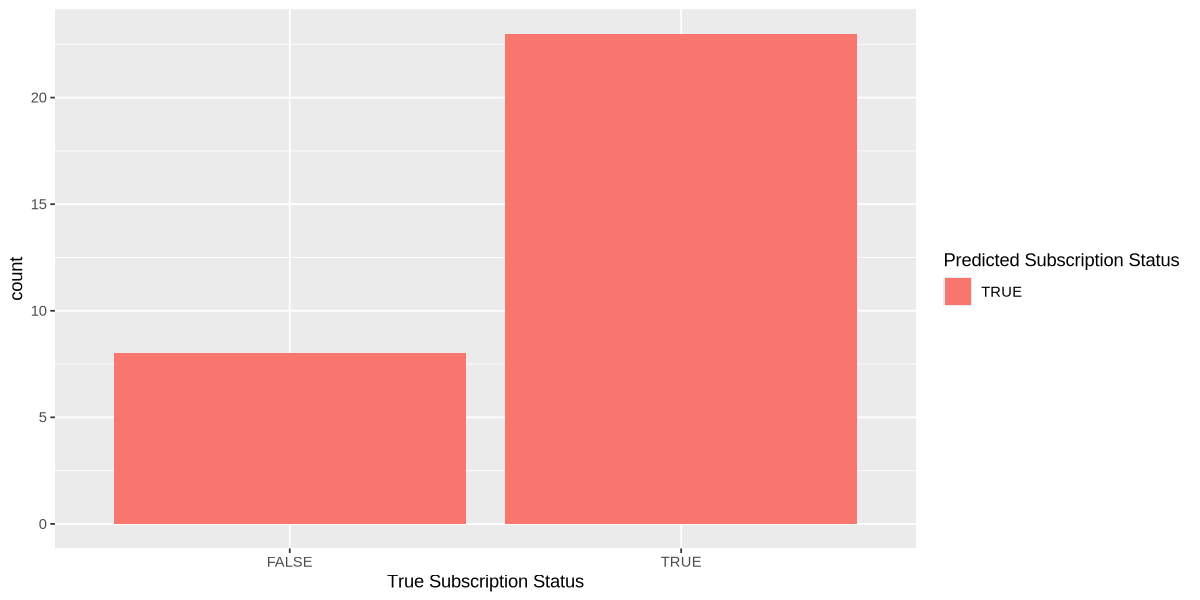

In [11]:
conf_plot <- videogame_predict |>
        ggplot(aes(x = subscribe, fill = .pred_class)) +
        geom_bar() +
        labs(x = "True Subscription Status", fill = "Predicted Subscription Status") 
conf_plot 

*figure 8*

We can observe that the model has simply predicted all `TRUE` which is problematic as it is essentially just a majority classifier. This is likely due to the aforementioned class imbalance. Due to the use of three predictors this bar plot is the best way for us to visualize our analysis with the tools within the scope of the course.

#### Oversampling 
To address the issue of class imbalance we can rebalance the data by oversampling the `FALSE` subscribe class.

In [36]:
set.seed(1)
videogame_upsample <- recipe(subscribe ~ Age + played_hours + average_session_length, data = videogame_train) |>
        step_upsample(subscribe, over_ratio = 1, skip = TRUE) |>
        prep(retain = TRUE) |>
        bake(new_data = NULL) 

upsample_vfold <- vfold_cv(videogame_upsample, v = 3, strata = subscribe)

The same tuning process done with the upsampled data.

[1] 2

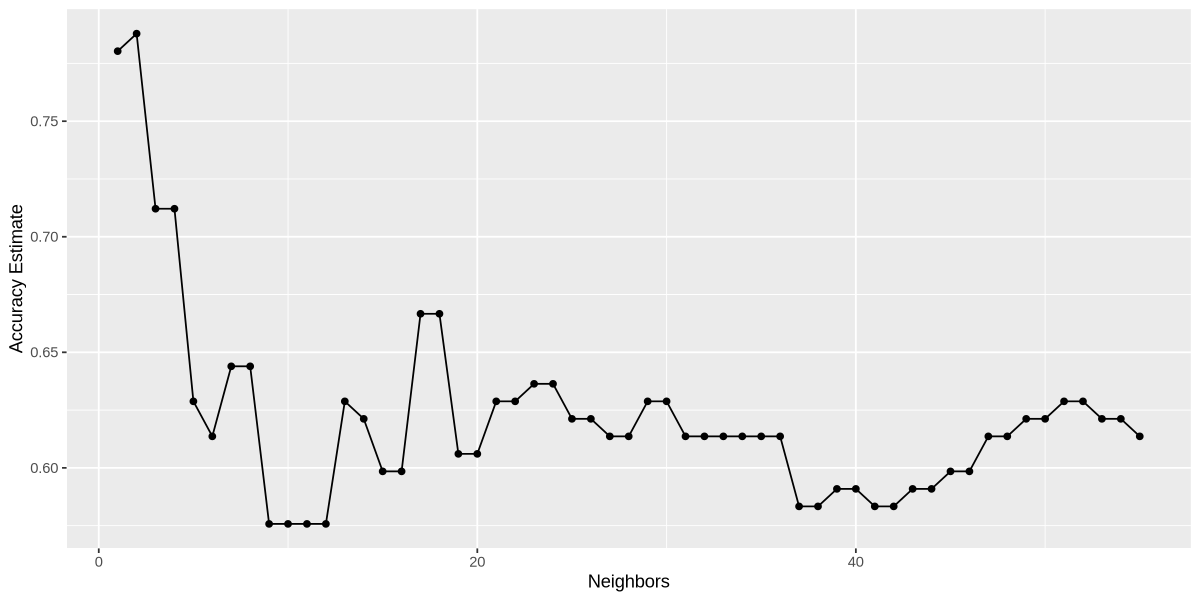

In [37]:
upsample_recipe <- recipe(subscribe ~ Age + played_hours + average_session_length, data = videogame_upsample) |>
        step_scale(all_predictors()) |>
        step_center(all_predictors())

upsample_wkfl <- workflow() |>
        add_recipe(upsample_recipe) |>
        add_model(knn_spec) |>
        tune_grid(resamples = upsample_vfold, grid = k_vals) |>
        collect_metrics() |> 
        filter(.metric == "accuracy") 

upsample_k_plot <- upsample_wkfl |>
        ggplot(aes(x = neighbors, y = mean)) +
        geom_point() +
        geom_line() +
        labs(x = "Neighbors", y = "Accuracy Estimate") 
upsample_k_plot

upsample_k <- upsample_wkfl |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)
upsample_k

*figure 9*

According to both the calculations done by R and *figure 8*, k = 2 yields the highest accuracy estimate. 

#### Predictions 
A workflow is used to fit the training data to the new model, using the original recipe and the k = 2 value we found from *figure 9*.This model is then tested using `videogame_test` and accuracy is computed.

In [38]:
upsample_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = upsample_k) |>
         set_engine("kknn") |>
         set_mode("classification") 

upsample_wkfl <- workflow() |>
        add_recipe(upsample_recipe) |>
        add_model(upsample_spec) |>
        fit(data = videogame_upsample) 

upsample_predict <-predict(upsample_wkfl, videogame_test) |>
        bind_cols(videogame_test)

upsample_predict_accuracy <- upsample_predict |>
        metrics(truth = subscribe, estimate = .pred_class) |>
        filter(.metric == "accuracy")
upsample_conf_mat<- upsample_predict|>
    conf_mat(truth = subscribe, estimate = .pred_class)

upsample_predict_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.5806452


*figure 10*

The accuracy for the model train on the upsampled data is 58% which is worse than the majority classifier. This indicates that it is not an effective classifier. 

In [43]:
upsample_conf_mat

          Truth
Prediction FALSE TRUE
     FALSE     0    5
     TRUE      8   18

*figure 11*

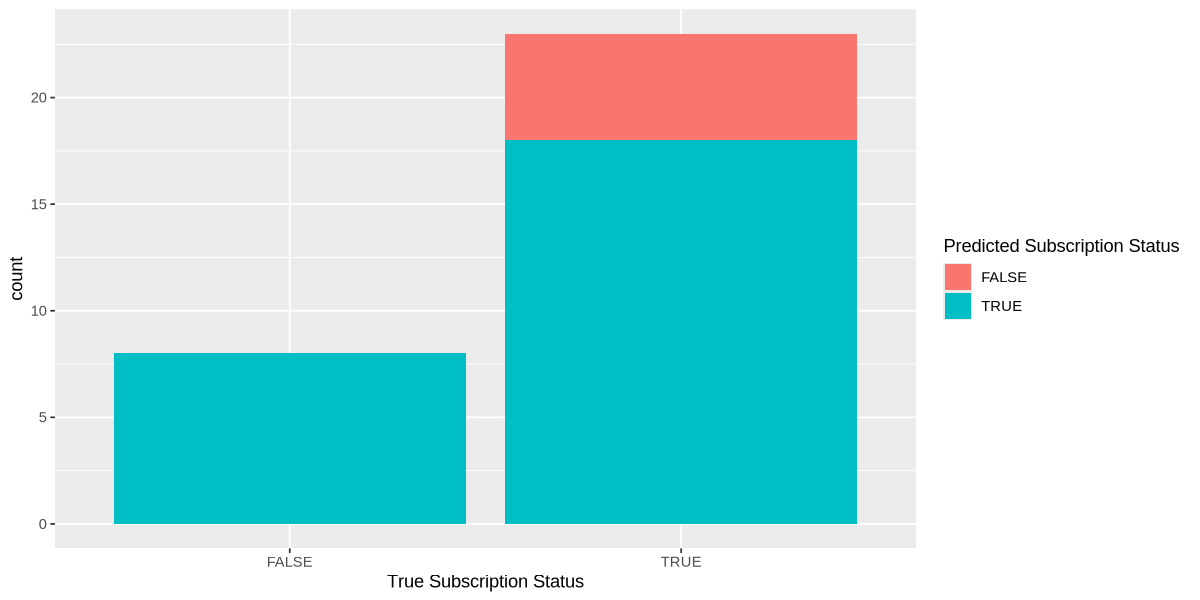

In [44]:
conf_plot <- upsample_predict |>
        ggplot(aes(x = subscribe, fill = .pred_class)) +
        geom_bar() +
        labs(x = "True Subscription Status", fill = "Predicted Subscription Status") 
conf_plot 

*figure 12*

Despite a lower overall accuracy, this model was able to sucessfully predict all the players who were not subscribed. It however was significantly worse than the initial model at predicting which players were subscribed to a newsletter.

#### Analysis by Gender

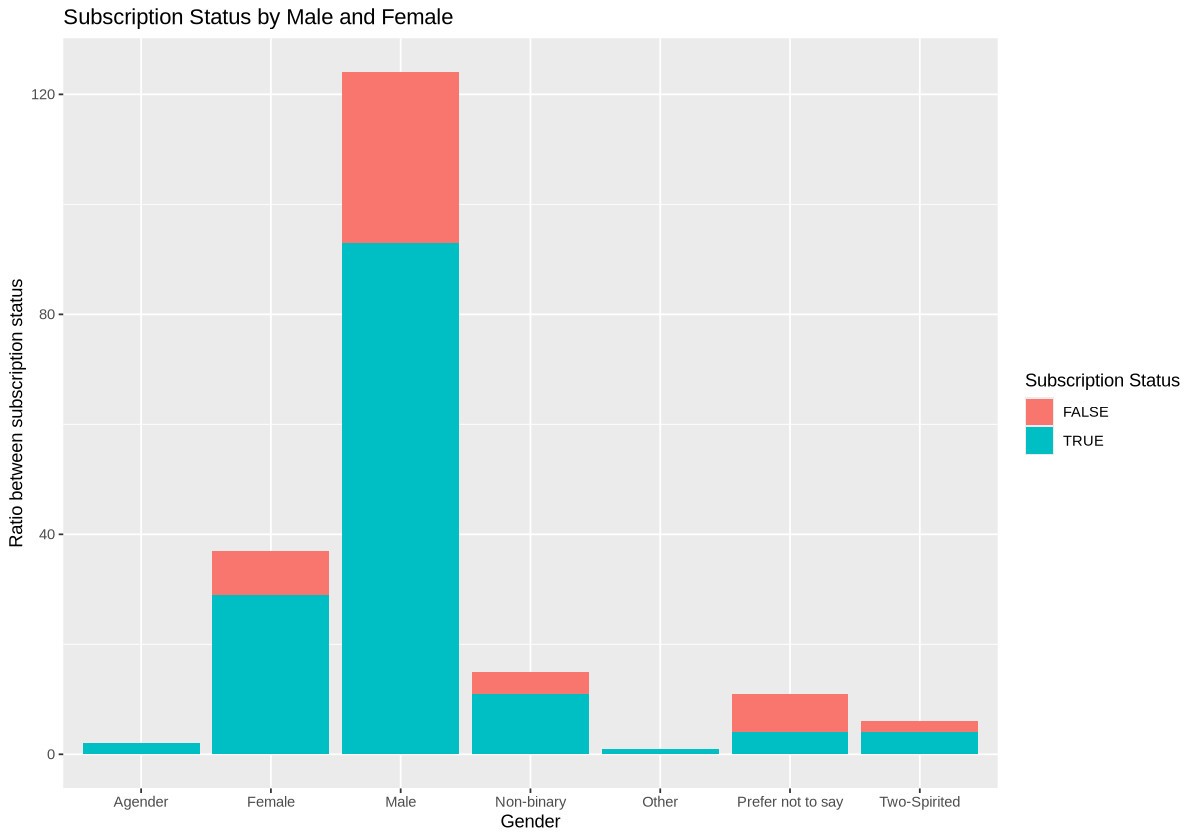

In [45]:
options(repr.plot.height = 7, repr.plot.width = 10)
gender_bar <- players_data |>
        ggplot(aes(x = gender)) +
        geom_bar(aes(fill = subscribe)) +
        ggtitle("Subscription Status by Male and Female") +
        labs(x = "Gender",
             y = "Ratio between subscription status",
             fill = "Subscription Status")
gender_bar

*figure 13*

The bar chart compares subscription status across gender categories. Male players dominate the largest portion of the data set, and thus they have the highest number of both subscribers and non subscribers. The second largest gender category is `Female` with again a majority subscribed. Due to the minimal number of players in other gender groups, it is challenging to make comparable statements. Overall, the plot suggests the subscription patterns mostly reflect the unequal distribution of genders in the dataset. 


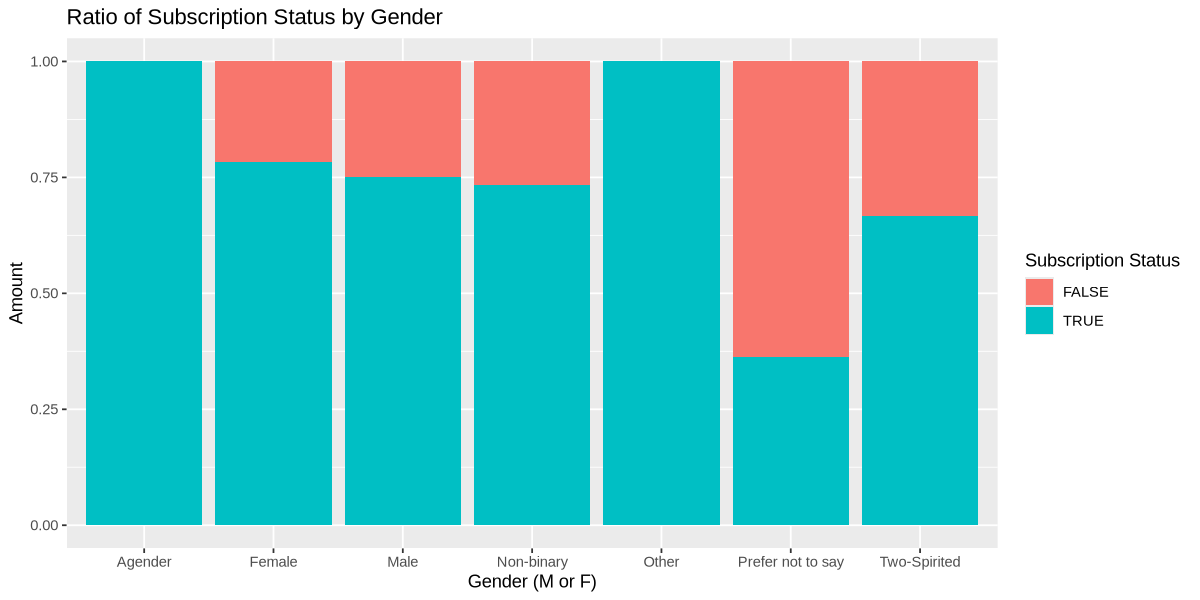

In [46]:
options(repr.plot.height = 5, repr.plot.width = 10)
gender_ratio <- players_data |>
        ggplot(aes(x = gender)) +
        geom_bar(aes(fill = subscribe), position = "fill") +
        ggtitle("Ratio of Subscription Status by Gender") +
        labs(x = "Gender (M or F)",
             y = "Amount",
             fill = "Subscription Status")
gender_ratio    


*figure 14*

The plot shows the proportion of subscribers and non-subscribers within each gender category using a fill-ratio bar chart. Most genders display a similar pattern, where a larger proportion of individuals are subscribed (True) compared to not subscribed (False). A few groups with smaller sample sizes show more variation, but this likely reflects limited data as observed in *figure 11* rather than a real difference. Overall, the chart suggests that subscription ratios are fairly consistent across genders.

## Discussion 

#### Summary
To answer our specific question of "Can hours played, age, and average session length predict whether a user is subscribed to a game-related newsletter?" we utilized KNN classification. Overall, we were unable to predict subscription status based on the different variables for the users in the dataset through our models. 
<br>
<br>
Using our model that was tuned off the training data, we found an accuracy of 74.19% when used to predict on the testing data. However, this was due to the model predicting only `True` values and the class imbalance between the subscribed and not subscribed. Therefore this model is not sufficient to predict a user's subscription status.
<br>
<br>
In an effort to fix this we balanced the data. Unfortunately, this model is also not sufficient to predict a user's subscription status. The model tuned with the balanced training data was 58% accurate on the testing data which is worse than the 73.55% accuracy found of the majority classifier. It incorrectly classified 46.67% of the subscribed players as not subscribed. However, it accurately predicted which users were not subscribed. This indicates that the model trained with the oversampled data is more useful than our previous model.
<br>
<br>
We also examined potential variations in subscription status through visualizations. There is a very unequal distribution of genders as the users are male dominated. The visuals created led to no clear evidence that gender has any effect on subscription status. The differences in *figure 14* are most likely due to lack of equal gender sampling. 


#### Expectations vs Findings
Based on our exploratory visuals and intuition, we expected the three behavioural variables, total hours played, age, and average session length, to be able to predict subscription status. It would intuitively follow that individuals who play more often or for longer would be more interested in video games and thus video game-related information found in newsletters. Similarly, younger people could have fewer obligations and be able to devote more time to hobbies such as gaming. Our exploratory plots (*figure 2* & *figure 3*) suggested that players who are younger, have a higher total playtime, and have longer average sessions were slightly more likely to be subscribed. We anticipated that we would be able to predict subscription status based on these three variables but that the accuracy would not be particularly high due to the weak relationships between the variables and subscription status. 
<br>
<br>
After training and tuning the K-NN, our findings differed from expectations. The initial model achieved an accuracy of 74.19% (*figure 5*). However, when examining the confusion matrix, it was evident that this model could not properly predict subscription status. This may be due to the limited data set of 121 players, significantly more subscribed players than not, or a general lack of a relationship to predict subscription status.
<br>
<br>
Despite initially disregarding the impact of the class imbalance, we decided to balance the data to explore if we could arrive at a better model. Although it had a worse overall accuracy of 58%, it was 100% accurate at classifying players who are not subscribed to a game-related newsletter in comparison to the 0% accuracy of the initial model (*figure 7*, *figure 10* & *figure 12*). This indicates that this model could be more useful since it is not as similar to the majority classifier. Due to its low accuracy, we would not say that it can successfully predict subscription status, which differs from what we expected. 
<br>
<br>
For the secondary question of whether these patterns differ by gender, we intuitively expected any differences to be small since interest in video game information should be similar among video game players regardless of gender. We were unsure whether the heavily male-dominated dataset would allow for a meaningful comparison.
<br>
<br>
Aligning with our expectations, we found no meaningful difference in subscription patterns, with similar subscriber proportions for male and female players (*gigure 13* & *figure 14*). Conclusions about other genders cannot be drawn due to low sample sizes. Therefore, we infer that gender is not predictive of subscription status.



#### Potential Impacts
If we assume that players who are subscribed to game-related newletter are generally more interesting in recieving information about video games. Therefore, if a company can predict subscription, they can also build an email list that target those most likely to participate in competitions or to make game-related purchases to improve monetization and engagment. Additionally, predicting receptivity to newsletter can increase brand trust as recieving irrelevant emails can irritate customers. 

#### Future Questions

- Does session length change before or after a player subscribes to a newsletter?
- Is there an age group that is more likely to subscribe than others?
- How can we make this classifier more generalizable for predicting subscription behaviour in other gaming communities or servers?
- What additional behavioural features (e.g., time of day played, frequency of logins) could improve the accuracy of the classifier?
- Would adding more behavioural features improve the model’s accuracy?
- Would a larger training set improve the model's accuracy?
